In [15]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [16]:
DATA_DIR = './Dataset'
BATCH_SIZE = 50
IMG_SIZE = (128,128)
SEED = 42

In [17]:
training_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="training"
    )

testing_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="validation"
    )


Found 10934 files belonging to 2 classes.
Using 8748 files for training.
Found 10934 files belonging to 2 classes.
Using 2186 files for validation.


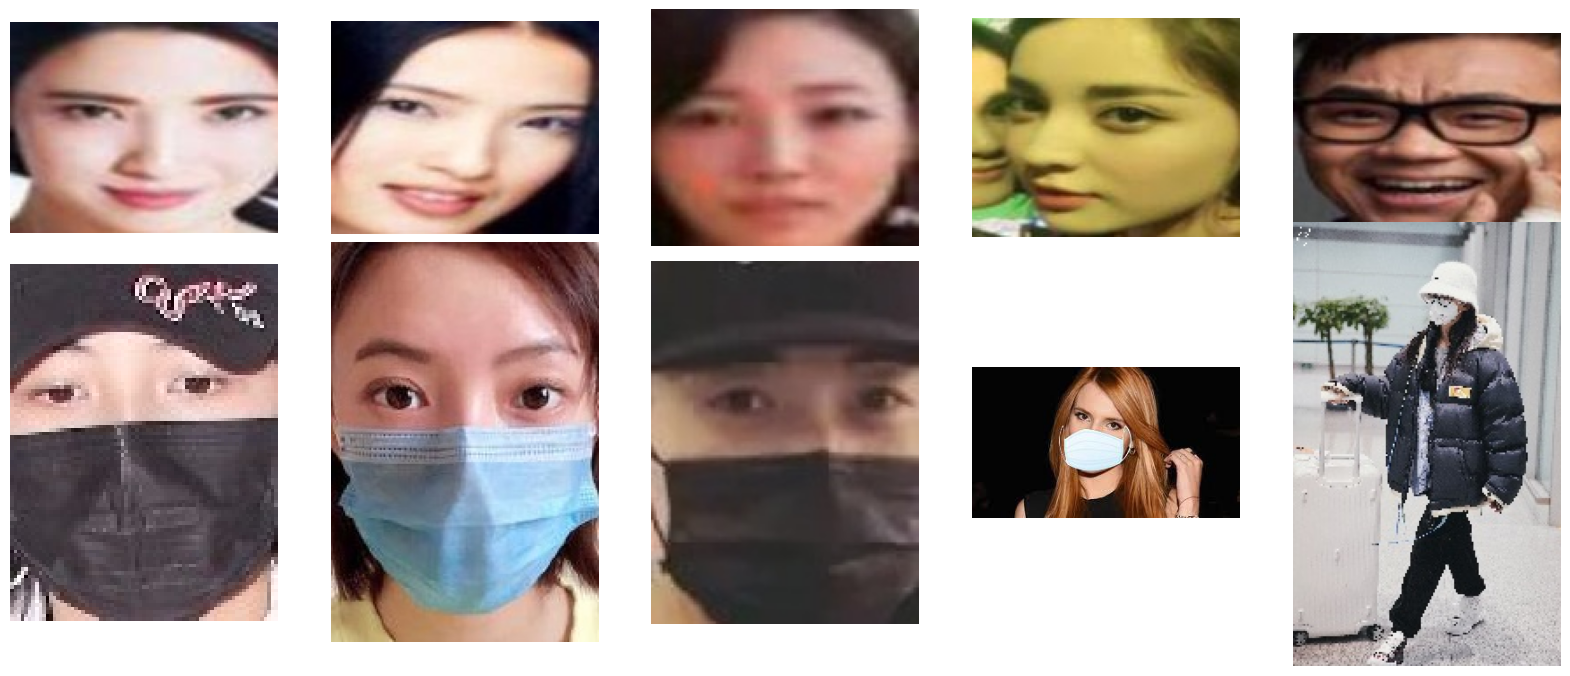

In [18]:
# Here we will display some of the images

sns.set()
sns.set_theme(style="darkgrid")

f = plt.figure(figsize=(20, 15))
without_mask_path = './Dataset/without_mask'
with_mask_path = './Dataset/with_mask'


for i in range(1,6):
    filename = random.choice(os.listdir(with_mask_path))
    image = plt.imread(os.path.join(with_mask_path,filename))
    x = f.add_subplot(1,5,i)
    x.axis(False)
    x.imshow(image)

for i in range(1,6):
    filename = random.choice(os.listdir(without_mask_path))
    image = plt.imread(os.path.join(without_mask_path,filename))
    x = f.add_subplot(2,5,i)
    x.axis(False)
    x.imshow(image)

plt.show()

In [27]:
model = keras.Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(units=256, activation="sigmoid"),
    Dense(units=2, activation="sigmoid")
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,658 (16.09 MB)

 Trainable params: 4,218,658 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compiling the model with the Adam optimizer and using binary_crossentropy as the loss function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
history = model.fit(training_images, epochs=20, steps_per_epoch=20, validation_data=testing_images)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.7264 - loss: 0.5984 - val_accuracy: 0.8564 - val_loss: 0.3812
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.8479 - loss: 0.3643 - val_accuracy: 0.8765 - val_loss: 0.3428
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.8504 - loss: 0.3840 - val_accuracy: 0.8902 - val_loss: 0.2883
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.9185 - loss: 0.2641 - val_accuracy: 0.9199 - val_loss: 0.2616
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - accuracy: 0.9158 - loss: 0.2548 - val_accuracy: 0.9163 - val_loss: 0.2468
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.9174 - loss: 0.2542 - val_accuracy: 0.9227 - val_loss: 0.2371
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.9224 - loss: 0.2493 - val_accuracy: 0.9209 - val_loss: 0.2380
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.9281 - loss: 0.2189 - val_accuracy: 0.

In [9]:
model.evaluate(testing_images)

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9589 - loss: 0.1272


[0.11761092394590378, 0.9629459977149963]

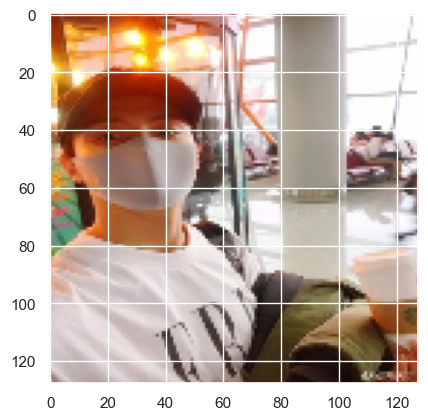

In [10]:
# Loading a random image from the WithMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/with_mask/250.jpg", target_size=([128,128,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [11]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.99773806, 0.00843633]], dtype=float32)

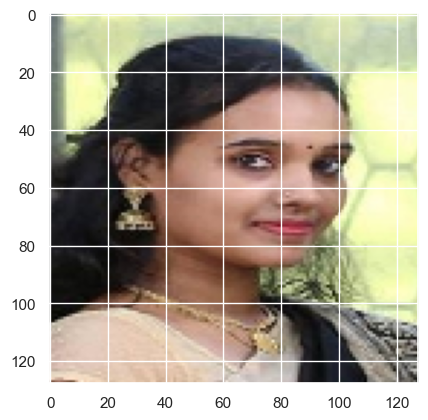

In [12]:
# Loading a random image from the WithoutMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/without_mask/621.jpg", target_size=([128,128,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [13]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.27460966, 0.76120925]], dtype=float32)

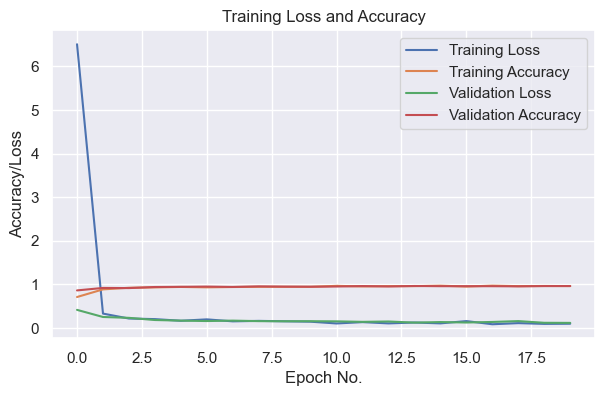

In [14]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_theme(style="darkgrid")

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

no_of_epochs = range(len(training_loss))

sns.lineplot(x = no_of_epochs, y = training_loss, label = "Training Loss")
sns.lineplot(x = no_of_epochs, y = training_accuracy, label = "Training Accuracy")
sns.lineplot(x = no_of_epochs, y = validation_loss, label = "Validation Loss")
sns.lineplot(x = no_of_epochs, y = validation_accuracy, label = "Validation Accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy/Loss")
plt.show()